In [1]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix


import statsmodels.api as sm
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')


In [3]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [4]:
target = filtered_data['Severity'].shift(-1)

In [5]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:16:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

Mean Squared Error (MSE): 274.5961268746212
Mean Absolute Error (MAE): 8.659341373061032
R² Score: 0.8708179962945832


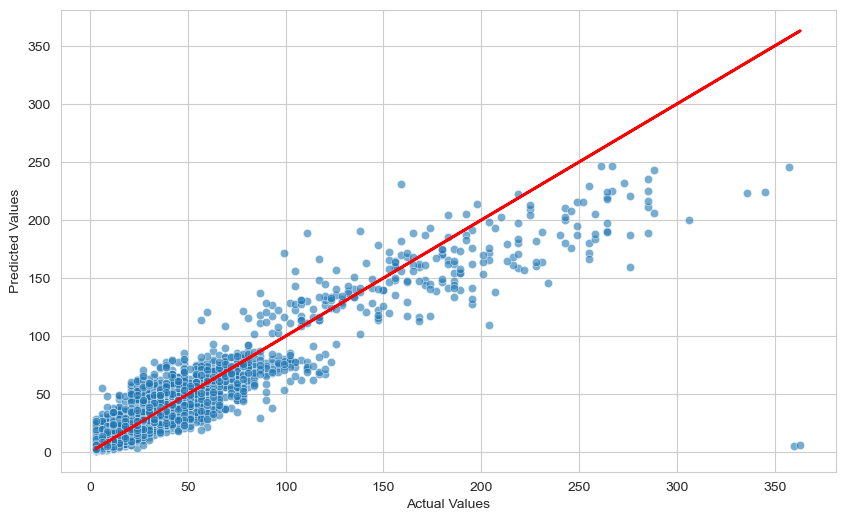

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات اصلی نمودار
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# رسم نمودار پراکنش پیش‌بینی‌ها در مقابل مقادیر واقعی
sns.scatterplot(x=y_test, y=y_pred_combined, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# رسم خط برابری (y=x) برای مقایسه بهتر
plt.plot(y_test, y_test, color='red', linewidth=2)

# نمایش نمودار
plt.show()

In [7]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2

from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_combined))
mae = mean_absolute_error(y_test, y_pred_combined)

print("Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:16:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error (RMSE): 11.046722247085944
Mean Absolute Error (MAE): 7.146166067720034
R² Score: 0.8524824940641514


In [9]:
global Nmse_values, mae_values, r2_values
Nmse_values = []
ioa_values = []
r2_values = []
aic_values=[]
bic_values=[]

mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
predicted_counts = (y_pred_xgb + y_pred_poisson) / 2


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)



def nmse(y_true, y_pred):
    
    N = y_true.shape[0]

    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)

    numerator = 1 / N * (np.sum((y_true - y_pred) ** 2))
    denominator = (y_true_bar * y_pred_bar)

    return numerator / denominator



nmse(y_test, predicted_counts)



nmse_score = nmse(y_test, predicted_counts)


print("NMSE score:", nmse_score)





print("NMSE:", nmse)

def index_of_agreement(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    assert y_true.shape == y_pred.shape, "Input arrays must have the same shape."
    
    y_true_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - y_true_mean) + np.abs(y_true - y_true_mean)))
    
    ioa = 1 - (numerator / denominator)
    
    return ioa

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")


Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)
# محاسبه مقدار MSE
mse = mean_squared_error(y_test, predicted_counts)


# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:20:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 11.046722247085944
MAE: 7.146166067720034
R^2: 0.8524824940641514
NMSE score: 0.1979447264364234
NMSE: <function nmse at 0x7fe01817c670>
Index of Agreement: 0.96
AIC: 17646.40201464148
BIC: 17900.771136877018


In [10]:
ioa_values

[0.9566456847212417]

# CarPngr

In [11]:
filtered_data2 = data[data['CarPngr'] == 1]


In [12]:
target = filtered_data2['Severity'].shift(-1)


In [13]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


# تقسیم داده‌ها به آموزش و تست
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:22:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

Mean Squared Error (MSE): 58.34581913818626
Mean Absolute Error (MAE): 4.9344465583966866
R² Score: 0.7026513953564654


In [15]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2

from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_combined))

print("Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:22:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error (RMSE): 6.542267684930789
Mean Absolute Error (MAE): 4.546948359654118
R² Score: 0.5995760527473524


In [16]:
global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]

mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
predicted_counts = (y_pred_xgb + y_pred_poisson) / 2


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)



def nmse(y_true, y_pred):
    
    N = y_true.shape[0]

    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)

    numerator = 1 / N * (np.sum((y_true - y_pred) ** 2))
    denominator = (y_true_bar * y_pred_bar)

    return numerator / denominator



nmse(y_test, predicted_counts)



nmse_score = nmse(y_test, predicted_counts)


print("NMSE score:", nmse_score)





print("NMSE:", nmse)

def index_of_agreement(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    assert y_true.shape == y_pred.shape, "Input arrays must have the same shape."
    
    y_true_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - y_true_mean) + np.abs(y_true - y_true_mean)))
    
    ioa = 1 - (numerator / denominator)
    
    return ioa

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")


Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)
# محاسبه مقدار MSE
mse = mean_squared_error(y_test, predicted_counts)


# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:22:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 6.542267684930789
MAE: 4.546948359654118
R^2: 0.5995760527473524
NMSE score: 0.3481652443118637
NMSE: <function nmse at 0x7fdfdc6f6f70>
Index of Agreement: 0.86
AIC: 13034.645403281476
BIC: 13286.612938184604


# Motor

In [17]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
target = filtered_data3['Severity'].shift(-1)

In [18]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


# تقسیم داده‌ها به آموزش و تست
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:23:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

Mean Squared Error (MSE): 113.50645112722562
Mean Absolute Error (MAE): 6.482198384734688
R² Score: 0.9112805925614726


In [20]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2

from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_combined))

print("Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:23:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error (RMSE): 9.646513737883867
Mean Absolute Error (MAE): 6.01522720659461
R² Score: 0.8664805983721066


In [21]:
global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]

mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
predicted_counts = (y_pred_xgb + y_pred_poisson) / 2


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)



def nmse(y_true, y_pred):
    
    N = y_true.shape[0]

    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)

    numerator = 1 / N * (np.sum((y_true - y_pred) ** 2))
    denominator = (y_true_bar * y_pred_bar)

    return numerator / denominator



nmse(y_test, predicted_counts)



nmse_score = nmse(y_test, predicted_counts)


print("NMSE score:", nmse_score)





print("NMSE:", nmse)

def index_of_agreement(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    assert y_true.shape == y_pred.shape, "Input arrays must have the same shape."
    
    y_true_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - y_true_mean) + np.abs(y_true - y_true_mean)))
    
    ioa = 1 - (numerator / denominator)
    
    return ioa

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")


Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)
# محاسبه مقدار MSE
mse = mean_squared_error(y_test, predicted_counts)


# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:23:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 9.646513737883867
MAE: 6.01522720659461
R^2: 0.8664805983721066
NMSE score: 0.250809428401387
NMSE: <function nmse at 0x7fdfdc6f6e50>
Index of Agreement: 0.96
AIC: 14851.14331131377
BIC: 15100.786931669412


# Pedal cyclist Regrasion

In [22]:
filtered_data4 = data[data['PdlCyclist'] == 1]
target = filtered_data4['Severity'].shift(-1)

In [23]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


# تقسیم داده‌ها به آموزش و تست
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:23:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

Mean Squared Error (MSE): 132.94671039053583
Mean Absolute Error (MAE): 6.53399210668928
R² Score: 0.835737853076788


In [25]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2

from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_combined))

print("Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:23:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error (RMSE): 9.451938290529538
Mean Absolute Error (MAE): 5.844403821236893
R² Score: 0.6922360502355476


In [26]:
global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]

mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
predicted_counts = (y_pred_xgb + y_pred_poisson) / 2


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)



def nmse(y_true, y_pred):
    
    N = y_true.shape[0]

    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)

    numerator = 1 / N * (np.sum((y_true - y_pred) ** 2))
    denominator = (y_true_bar * y_pred_bar)

    return numerator / denominator



nmse(y_test, predicted_counts)



nmse_score = nmse(y_test, predicted_counts)


print("NMSE score:", nmse_score)





print("NMSE:", nmse)

def index_of_agreement(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    assert y_true.shape == y_pred.shape, "Input arrays must have the same shape."
    
    y_true_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - y_true_mean) + np.abs(y_true - y_true_mean)))
    
    ioa = 1 - (numerator / denominator)
    
    return ioa

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")


Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)
# محاسبه مقدار MSE
mse = mean_squared_error(y_test, predicted_counts)


# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:23:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 9.451938290529538
MAE: 5.844403821236893
R^2: 0.6922360502355476
NMSE score: 0.4388357934677051
NMSE: <function nmse at 0x7fe01817c160>
Index of Agreement: 0.90
AIC: 16308.69205612722
BIC: 16562.56474962323


# Pedestrian

In [27]:
filtered_data5 = data[data['Pedestrian'] == 1]
target = filtered_data5['Severity'].shift(-1)

In [28]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


# تقسیم داده‌ها به آموزش و تست
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:24:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)

print("Mean Squared Error (RMSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

Mean Squared Error (RMSE): 72.21648043173302
Mean Absolute Error (MAE): 5.019086698569798
R² Score: 0.7238332591504857


In [30]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2

from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_combined))

print("Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:24:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error (RMSE): 7.520496107828728
Mean Absolute Error (MAE): 4.718379057281674
R² Score: 0.7416644247219198


In [31]:
global Nmse_values, mae_values, r2_values
#Nmse_values = []
#ioa_values = []
#r2_values = []
#aic_values=[]
#bic_values=[]

mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
predicted_counts = (y_pred_xgb + y_pred_poisson) / 2


rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)



def nmse(y_true, y_pred):
    
    N = y_true.shape[0]

    y_true_bar = np.mean(y_true)
    y_pred_bar = np.mean(y_pred)

    numerator = 1 / N * (np.sum((y_true - y_pred) ** 2))
    denominator = (y_true_bar * y_pred_bar)

    return numerator / denominator



nmse(y_test, predicted_counts)



nmse_score = nmse(y_test, predicted_counts)


print("NMSE score:", nmse_score)





print("NMSE:", nmse)

def index_of_agreement(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    assert y_true.shape == y_pred.shape, "Input arrays must have the same shape."
    
    y_true_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_pred - y_true))
    denominator = np.sum(np.square(np.abs(y_pred - y_true_mean) + np.abs(y_true - y_true_mean)))
    
    ioa = 1 - (numerator / denominator)
    
    return ioa

ioa = index_of_agreement(y_test, predicted_counts)
print(f"Index of Agreement: {ioa:.2f}")


Nmse_values.append(nmse_score)
ioa_values.append(ioa)
r2_values.append(r_squared)
# محاسبه مقدار MSE
mse = mean_squared_error(y_test, predicted_counts)


# AIC and BIC calculation
n = len(y_test)  # Number of observations
p = x_train.shape[1]  # Number of parameters; x_train includes the constant term

aic = n * np.log(rss / n) + 2 * (p + 1)  

bic = n * np.log(rss / n) + np.log(n) * (p + 1)

print("AIC:", aic)
print("BIC:", bic)
aic_values.append(aic)
bic_values.append(bic)


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [14:24:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 7.520496107828728
MAE: 4.718379057281674
R^2: 0.7416644247219198
NMSE score: 0.32508347395117393
NMSE: <function nmse at 0x7fdfe90103a0>
Index of Agreement: 0.92
AIC: 7317.2287377511875
BIC: 7542.386202168998


In [34]:
Nmse_values

[0.1979447264364234,
 0.3481652443118637,
 0.250809428401387,
 0.4388357934677051,
 0.32508347395117393]

In [35]:
ioa_values

[0.9566456847212417,
 0.8607352191380724,
 0.960300884665666,
 0.8991532569280105,
 0.9209119006625178]

In [36]:
r2_values

[0.8524824940641514,
 0.5995760527473524,
 0.8664805983721066,
 0.6922360502355476,
 0.7416644247219198]

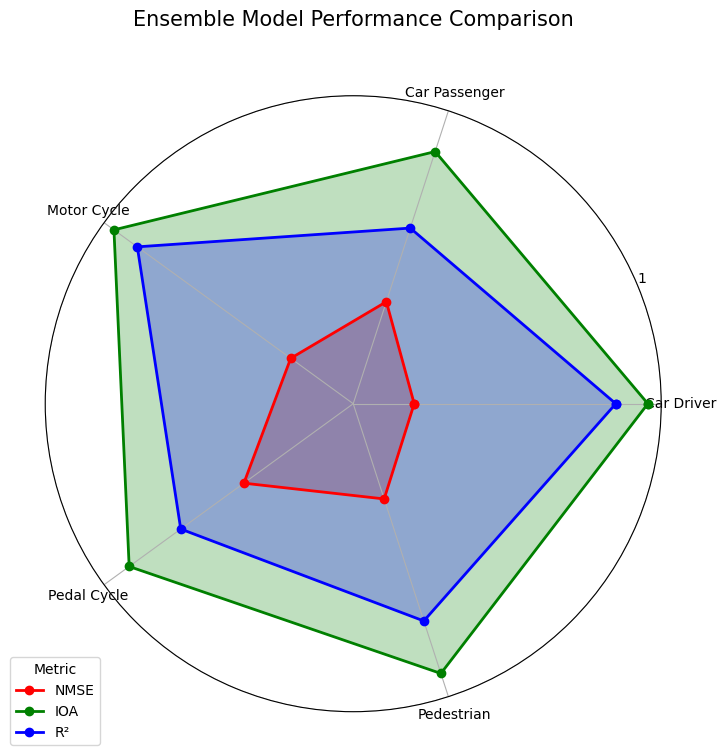

In [37]:
import matplotlib.pyplot as plt
import numpy as np

nmse_values = [0.1979447264364234,
 0.3481652443118637,
 0.250809428401387,
 0.4388357934677051,
 0.32508347395117393]


ioa_values = [0.9566456847212417,
 0.8607352191380724,
 0.960300884665666,
 0.8991532569280105,
 0.9209119006625178]

r2_values =[0.8524824940641514,
 0.5995760527473524,
 0.8664805983721066,
 0.6922360502355476,
 0.7416644247219198]

labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

data = np.array([nmse_values, ioa_values, r2_values])

num_vars = data.shape[1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['red', 'green', 'blue']
labels_metric = ['NMSE', 'IOA', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  
    else:
        alpha_value = 0.25 
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('Ensemble Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.set_ylim(0, 1)

plt.show()


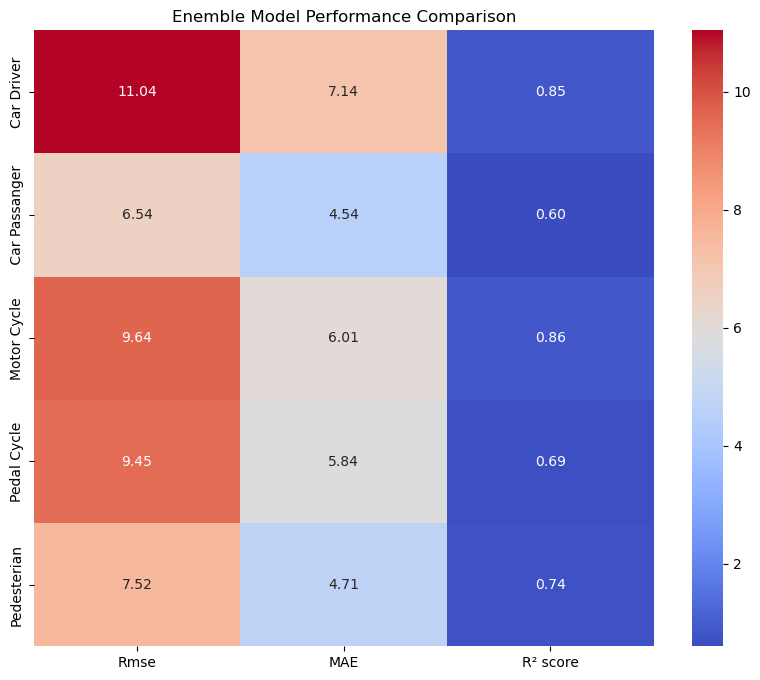

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید که مقادیر MSE، MAE و R² برای هر پنج مدل را دارید
Rmse_values = [11.04, 6.54 , 9.64, 9.45 ,7.52]
mae_values = [7.14  , 4.54, 6.01, 5.84, 4.71]
r2_values = [0.85   ,0.60 ,0.86 ,0.69  ,0.74 ]
 
# ایجاد داده‌ها برای هیت مپ
metrics = ['Car Driver', ' Car Passanger ', 'Motor Cycle', 'Pedal Cycle', 'Pedesterian']
models = ['Rmse', 'MAE', 'R² score']
data = np.array([Rmse_values, mae_values, r2_values]).T
#metrics
# ایجاد هیت مپ
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data, annot=True, fmt='.2f', xticklabels=models, yticklabels=metrics, cmap='coolwarm')
heatmap.set_title('Enemble Model Performance Comparison')

plt.show()

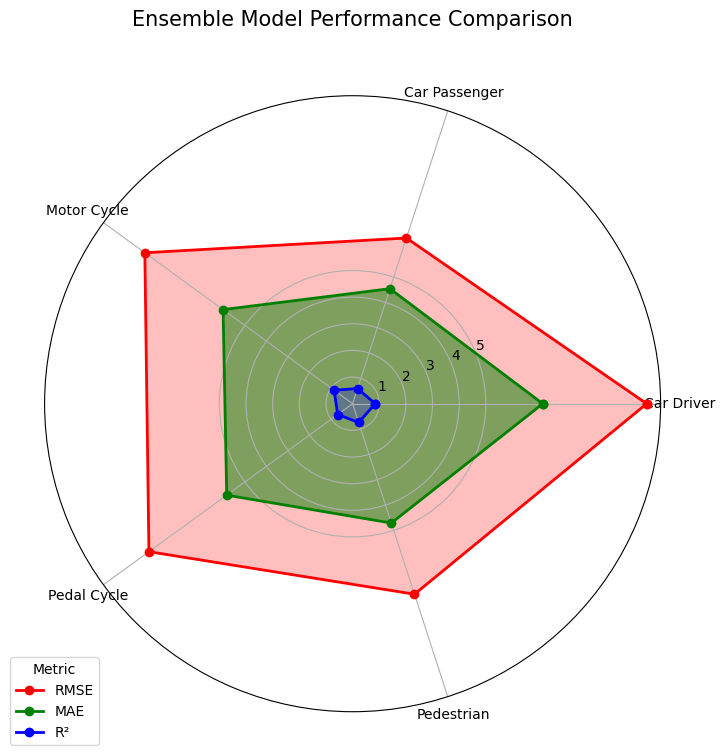

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
mse_values = [11.04, 6.54 , 9.64, 9.45 ,7.52]
mae_values = [7.14  , 4.54, 6.01, 5.84, 4.71]
r2_values = [0.85   ,0.60 ,0.86 ,0.69  ,0.74 ]

# نام مدل‌ها
labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# تعداد متغیرها
num_vars = data.shape[1]

# تقسیم دایره به بخش‌های مساوی
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # بستن دایره

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# رنگ‌ها برای هر معیار
colors = ['red', 'green', 'blue']
labels_metric = ['RMSE', 'MAE', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  # تنظیم شفافیت برای MAE
    else:
        alpha_value = 0.25  # تنظیم شفافیت برای سایر معیارها
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  # بستن دایره
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  # تنظیم موقعیت برچسب‌ها
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  # تنظیم مقیاس محور y
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('Ensemble Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


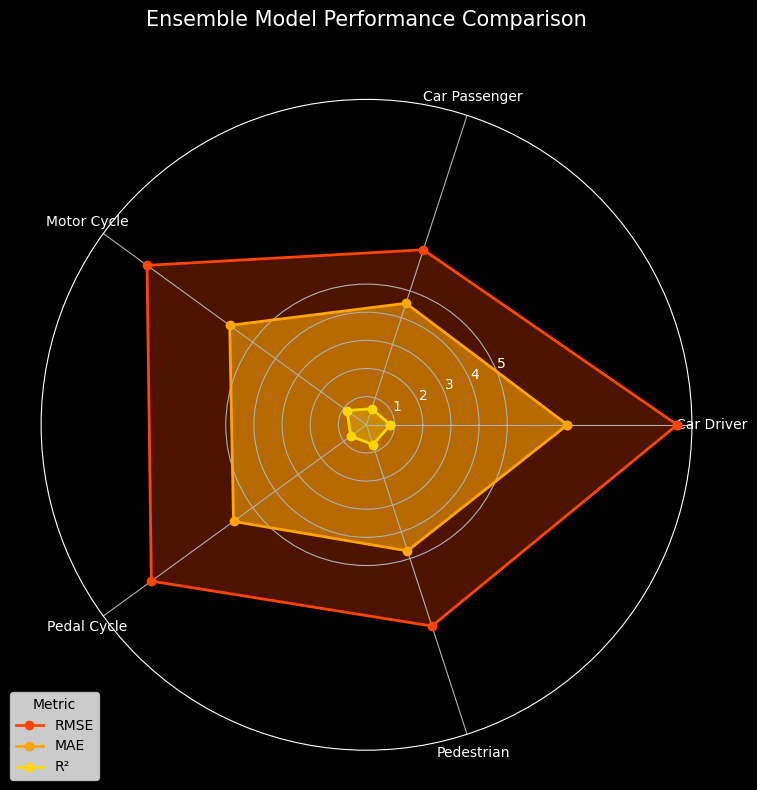

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
Rmse_values = [11.04, 6.54 , 9.64, 9.45 ,7.52]
mae_values = [7.14  , 4.54, 6.01, 5.84, 4.71]
r2_values = [0.85   ,0.60 ,0.86 ,0.69  ,0.74 ]

# نام مدل‌ها
labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# تعداد متغیرها
num_vars = data.shape[1]

# تقسیم دایره به بخش‌های مساوی
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # بستن دایره

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# رنگ‌های گرم برای هر معیار
colors = ['#FF4500', '#FFA500', '#FFD700']
labels_metric = ['RMSE', 'MAE', 'R²']

# تنظیم رنگ زمینه به مشکی
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.6  # تنظیم شفافیت برای MAE
    else:
        alpha_value = 0.3  # تنظیم شفافیت برای سایر معیارها
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  # بستن دایره
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  # تنظیم موقعیت برچسب‌ها
ax.set_xticklabels(labels, color='white')
ax.set_yticks([1, 2, 3, 4, 5])  # تنظیم مقیاس محور y
ax.set_yticklabels(['1', '2', '3', '4', '5'], color='white')
ax.spines['polar'].set_color('white')  # تنظیم رنگ محور قطبی

# تنظیم رنگ متن عنوان
plt.title('Ensemble Model Performance Comparison', size=15, color='white', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.tight_layout()
plt.show()